Design and implement Deep Convolutional GAN to generate images
of faces/digits from a set of given images.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv2DTranspose, LeakyReLU , Conv2D,Flatten
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm

# Load and preprocess the dataset (e.g., MNIST)
(X_train, _), (_, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255
X_train = np.expand_dims(X_train, axis=-1)

# Define the generator model
generator = Sequential([
    Dense(7 * 7 * 128, input_shape=(100,)),
    Reshape((7, 7, 128)),
    Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'),
    LeakyReLU(alpha=0.2),
    Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'),
    LeakyReLU(alpha=0.2),
    Conv2DTranspose(1, (7, 7), activation='sigmoid', padding='same')
])

# Define the discriminator model
discriminator = Sequential([
    Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=(28, 28, 1)),
    LeakyReLU(alpha=0.2),
    Conv2D(128, (3, 3), strides=(2, 2), padding='same'),
    LeakyReLU(alpha=0.2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the discriminator (we don't compile the combined GAN model)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))

# Define the combined GAN model
discriminator.trainable = False
gan = Sequential([generator, discriminator])
gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))

# Training parameters
epochs = 72
batch_size = 64 # 64/ 128 / 256

# Train the GAN
for epoch in range(epochs):
    for _ in tqdm(range(batch_size)):
        # Generate fake images
        noise = np.random.normal(0, 1, (batch_size, 100))
        fake_images = generator.predict(noise)

        # Select a random batch of real images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_images = X_train[idx]

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print progress
    print(f"Epoch {epoch + 1}/{epochs}  - Discriminator Loss: {d_loss}, Generator Loss: {g_loss}")



  0%|          | 0/64 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 352ms/step


  2%|▏         | 1/64 [00:18<19:22, 18.45s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step


  3%|▎         | 2/64 [00:22<10:03,  9.73s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step


  5%|▍         | 3/64 [00:26<07:22,  7.26s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 348ms/step


  6%|▋         | 4/64 [00:31<06:23,  6.40s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 344ms/step


  8%|▊         | 5/64 [00:35<05:26,  5.53s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 400ms/step


  9%|▉         | 6/64 [00:39<04:49,  5.00s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 314ms/step


 11%|█         | 7/64 [00:43<04:31,  4.76s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 300ms/step


 12%|█▎        | 8/64 [00:48<04:18,  4.62s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 317ms/step


 14%|█▍        | 9/64 [00:52<04:08,  4.53s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step


 16%|█▌        | 10/64 [00:56<03:59,  4.44s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 457ms/step


 17%|█▋        | 11/64 [01:00<03:48,  4.31s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step


 19%|█▉        | 12/64 [01:04<03:36,  4.17s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step


 20%|██        | 13/64 [01:08<03:35,  4.23s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step


 22%|██▏       | 14/64 [01:12<03:26,  4.13s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step


 23%|██▎       | 15/64 [01:16<03:16,  4.00s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step


 25%|██▌       | 16/64 [01:20<03:09,  3.94s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step


 27%|██▋       | 17/64 [01:24<03:03,  3.91s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 28%|██▊       | 18/64 [01:27<03:00,  3.92s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 365ms/step


 30%|██▉       | 19/64 [01:32<03:07,  4.17s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 331ms/step


 31%|███▏      | 20/64 [01:37<03:05,  4.21s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 434ms/step


 33%|███▎      | 21/64 [01:40<02:56,  4.11s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step


 34%|███▍      | 22/64 [01:44<02:47,  3.98s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 310ms/step


 36%|███▌      | 23/64 [01:48<02:40,  3.91s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step


 38%|███▊      | 24/64 [01:52<02:35,  3.90s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 353ms/step


 39%|███▉      | 25/64 [01:56<02:37,  4.05s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 457ms/step


 41%|████      | 26/64 [02:00<02:34,  4.07s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 312ms/step


 42%|████▏     | 27/64 [02:04<02:27,  3.99s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step


 44%|████▍     | 28/64 [02:08<02:19,  3.89s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 303ms/step


 45%|████▌     | 29/64 [02:12<02:20,  4.00s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 369ms/step


 47%|████▋     | 30/64 [02:16<02:21,  4.15s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 440ms/step


 48%|████▊     | 31/64 [02:20<02:13,  4.03s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step


 50%|█████     | 32/64 [02:24<02:04,  3.90s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step


 52%|█████▏    | 33/64 [02:28<02:00,  3.90s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 321ms/step


 53%|█████▎    | 34/64 [02:32<01:56,  3.90s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step


 55%|█████▍    | 35/64 [02:35<01:50,  3.82s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step


 56%|█████▋    | 36/64 [02:39<01:46,  3.82s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step


 58%|█████▊    | 37/64 [02:43<01:42,  3.78s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 59%|█████▉    | 38/64 [02:46<01:36,  3.73s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step


 61%|██████    | 39/64 [02:50<01:34,  3.78s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 340ms/step


 62%|██████▎   | 40/64 [02:54<01:32,  3.84s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 379ms/step


 64%|██████▍   | 41/64 [02:58<01:27,  3.82s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step


 66%|██████▌   | 42/64 [03:02<01:22,  3.74s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 67%|██████▋   | 43/64 [03:05<01:18,  3.72s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step


 69%|██████▉   | 44/64 [03:09<01:14,  3.74s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step


 70%|███████   | 45/64 [03:13<01:11,  3.75s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 397ms/step


 72%|███████▏  | 46/64 [03:17<01:08,  3.81s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step


 73%|███████▎  | 47/64 [03:21<01:05,  3.84s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step


 75%|███████▌  | 48/64 [03:24<01:01,  3.82s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 77%|███████▋  | 49/64 [03:28<00:57,  3.82s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 78%|███████▊  | 50/64 [03:32<00:53,  3.79s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 330ms/step


 80%|███████▉  | 51/64 [03:36<00:49,  3.83s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step


 81%|████████▏ | 52/64 [03:40<00:45,  3.79s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 83%|████████▎ | 53/64 [03:43<00:41,  3.77s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 84%|████████▍ | 54/64 [03:47<00:37,  3.79s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 86%|████████▌ | 55/64 [03:51<00:33,  3.77s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


 88%|████████▊ | 56/64 [03:57<00:35,  4.43s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 378ms/step


 89%|████████▉ | 57/64 [04:01<00:30,  4.42s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step


 91%|█████████ | 58/64 [04:05<00:24,  4.14s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step


 92%|█████████▏| 59/64 [04:09<00:20,  4.05s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 94%|█████████▍| 60/64 [04:12<00:15,  3.93s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 386ms/step


 95%|█████████▌| 61/64 [04:16<00:11,  3.93s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step


 97%|█████████▋| 62/64 [04:20<00:07,  3.86s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 98%|█████████▊| 63/64 [04:23<00:03,  3.80s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


100%|██████████| 64/64 [04:27<00:00,  4.19s/it]


Epoch 1/2  - Discriminator Loss: 0.7053607702255249, Generator Loss: 0.6717520952224731


  0%|          | 0/64 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


  2%|▏         | 1/64 [00:03<03:57,  3.78s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 350ms/step


  3%|▎         | 2/64 [00:08<04:13,  4.08s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step


  5%|▍         | 3/64 [00:12<04:11,  4.11s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step


  6%|▋         | 4/64 [00:16<04:02,  4.04s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step


  8%|▊         | 5/64 [00:19<03:53,  3.96s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 346ms/step


  9%|▉         | 6/64 [00:24<03:51,  4.00s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step


 11%|█         | 7/64 [00:28<03:55,  4.13s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 344ms/step


 12%|█▎        | 8/64 [00:33<04:02,  4.33s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 458ms/step


 14%|█▍        | 9/64 [00:37<03:57,  4.32s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 350ms/step


 16%|█▌        | 10/64 [00:42<03:58,  4.41s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 381ms/step


 17%|█▋        | 11/64 [00:48<04:18,  4.87s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 310ms/step


 19%|█▉        | 12/64 [00:52<04:01,  4.65s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step


 20%|██        | 13/64 [00:56<03:47,  4.46s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 276ms/step


 22%|██▏       | 14/64 [01:00<03:33,  4.27s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step


 23%|██▎       | 15/64 [01:03<03:23,  4.14s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 25%|██▌       | 16/64 [01:07<03:14,  4.06s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 308ms/step


 27%|██▋       | 17/64 [01:11<03:10,  4.06s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 28%|██▊       | 18/64 [01:15<03:03,  3.98s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 320ms/step


 30%|██▉       | 19/64 [01:19<03:03,  4.08s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step


 31%|███▏      | 20/64 [01:23<02:57,  4.05s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 398ms/step


 33%|███▎      | 21/64 [01:27<02:51,  3.98s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step


 34%|███▍      | 22/64 [01:34<03:28,  4.95s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 488ms/step


 36%|███▌      | 23/64 [01:42<03:54,  5.71s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 377ms/step


 38%|███▊      | 24/64 [01:48<03:47,  5.68s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 406ms/step


 39%|███▉      | 25/64 [01:54<03:48,  5.85s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 321ms/step


 41%|████      | 26/64 [01:58<03:24,  5.37s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 42%|████▏     | 27/64 [02:02<03:00,  4.88s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 44%|████▍     | 28/64 [02:06<02:43,  4.55s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 45%|████▌     | 29/64 [02:09<02:32,  4.36s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 301ms/step


 47%|████▋     | 30/64 [02:13<02:24,  4.24s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step


 48%|████▊     | 31/64 [02:17<02:15,  4.11s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 475ms/step


 50%|█████     | 32/64 [02:21<02:11,  4.10s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step


 52%|█████▏    | 33/64 [02:25<02:06,  4.08s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 354ms/step


 53%|█████▎    | 34/64 [02:31<02:18,  4.62s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 360ms/step


 55%|█████▍    | 35/64 [02:36<02:11,  4.53s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step


 56%|█████▋    | 36/64 [02:39<02:00,  4.29s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step


 58%|█████▊    | 37/64 [02:44<01:57,  4.35s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 374ms/step


 59%|█████▉    | 38/64 [02:48<01:56,  4.47s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 326ms/step


 61%|██████    | 39/64 [02:53<01:49,  4.36s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 326ms/step


 62%|██████▎   | 40/64 [02:56<01:41,  4.22s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 395ms/step


 64%|██████▍   | 41/64 [03:00<01:34,  4.13s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step


 66%|██████▌   | 42/64 [03:08<01:56,  5.30s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 379ms/step


 67%|██████▋   | 43/64 [03:14<01:49,  5.24s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 336ms/step


 69%|██████▉   | 44/64 [03:18<01:41,  5.09s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 70%|███████   | 45/64 [03:22<01:30,  4.79s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step


 72%|███████▏  | 46/64 [03:27<01:24,  4.70s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 73%|███████▎  | 47/64 [03:31<01:17,  4.56s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 364ms/step


 75%|███████▌  | 48/64 [03:36<01:13,  4.59s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 394ms/step


 77%|███████▋  | 49/64 [03:41<01:10,  4.71s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 78%|███████▊  | 50/64 [03:45<01:05,  4.65s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 80%|███████▉  | 51/64 [03:50<01:00,  4.67s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 81%|████████▏ | 52/64 [03:55<00:55,  4.65s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 382ms/step


 83%|████████▎ | 53/64 [04:00<00:52,  4.75s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


 84%|████████▍ | 54/64 [04:06<00:51,  5.13s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 371ms/step


 86%|████████▌ | 55/64 [04:11<00:47,  5.33s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 88%|████████▊ | 56/64 [04:17<00:42,  5.32s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 89%|████████▉ | 57/64 [04:20<00:33,  4.82s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 484ms/step


 91%|█████████ | 58/64 [04:26<00:29,  4.97s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


 92%|█████████▏| 59/64 [04:33<00:28,  5.63s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step


 94%|█████████▍| 60/64 [04:40<00:24,  6.04s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 386ms/step


 95%|█████████▌| 61/64 [04:45<00:16,  5.66s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 311ms/step


 97%|█████████▋| 62/64 [04:48<00:10,  5.14s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 98%|█████████▊| 63/64 [04:52<00:04,  4.77s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


100%|██████████| 64/64 [04:56<00:00,  4.63s/it]

Epoch 2/2  - Discriminator Loss: 0.7204010486602783, Generator Loss: 0.6443185210227966


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


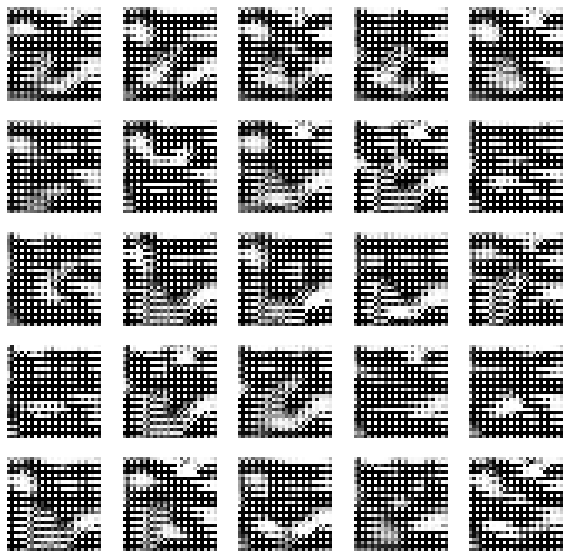

In [4]:
# Generate and visualize fake images
def plot_images(images):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.show()

# Generate fake images
noise = np.random.normal(0, 1, (25, 100))
generated_images = generator.predict(noise)

# Visualize generated images
plot_images(generated_images)